<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Machine Learning Foundation

## Course 3, Part e: Bagging DEMO

Estimated time needed: **45** minutes

## Objectives

After completing this demo you will be able to:

*   Understand what Bagging is
*   Recognize that Random Forests is an implementation of bagging and its abilities
*   Describe the advantages of Random Forests over simply adding extra Decision Trees


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Setup">Part 1: Setup</a></li>
        <li><a href="https://#TargPreproc">Part 2: Examining the Target and Preprocessing</a></li>
        <li><a href="https://#OOB">Part 3: Random Forest and Out-of-bag Error</a></li>
        <li><a href="https://#ExtraTrees">Part 4: Extra Trees</a></li>
        <li><a href="https://#results">Part 5: Gathering Results</a></li>
        <li><a href="https://#examineRes">Part 6: Examining Results</a></li>
</div>
<br>
<hr>


## Introduction

We will be using the customer churn data from the telecom industry that we used in the KNN Lab. Since we preprocessed the data there, we will import the preprocessed data, which is in a file called: 'churndata_processed.csv'


In [1]:
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
def evaluation_check(test, pred, title='MODEL EVALUATION'):
    df = pd.DataFrame({'test_data': test, 'pred_data': pred})
    df['compare'] = (df['test_data'] == df['pred_data']).astype(bool)
    ax = df['compare'].value_counts().plot \
                        .pie(autopct='%1.2f%%', labels=['True', 'False'],
                             colors=['lightgreen', 'red'], figsize=(5,5))
    ax.set(title=title, ylabel='')
    plt.show()
    # return df

<h2 id = "Setup"> Part 1: Setup </h2>

*   The raw churndata has been setup as a variable 'churndata', and we have imported it above.
*   We will rely on the data preprocessing from the KNN lab, which is captured in the file 'churndata_processed.csv'
*   First, import that file and examine its contents.
*   Output summary statistics and check variable data types
*   Using Seaborn, plot a heatmap of variable correlations


In [4]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [5]:
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [7]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
multiple,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
gb_mon,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
protection,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
unlimited,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
paperless,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


In [8]:
data.isnull().sum()  # no null values

months                       0
multiple                     0
gb_mon                       0
security                     0
backup                       0
protection                   0
support                      0
unlimited                    0
contract                     0
paperless                    0
monthly                      0
satisfaction                 0
churn_value                  0
payment_Credit Card          0
payment_Mailed Check         0
internet_type_DSL            0
internet_type_Fiber Optic    0
internet_type_None           0
offer_Offer A                0
offer_Offer B                0
offer_Offer C                0
offer_Offer D                0
offer_Offer E                0
dtype: int64

Let's plot a heatmap to examine feature correlations. Very light cells indicate high positive correlation, while very dark cells indicate high negative correlation.


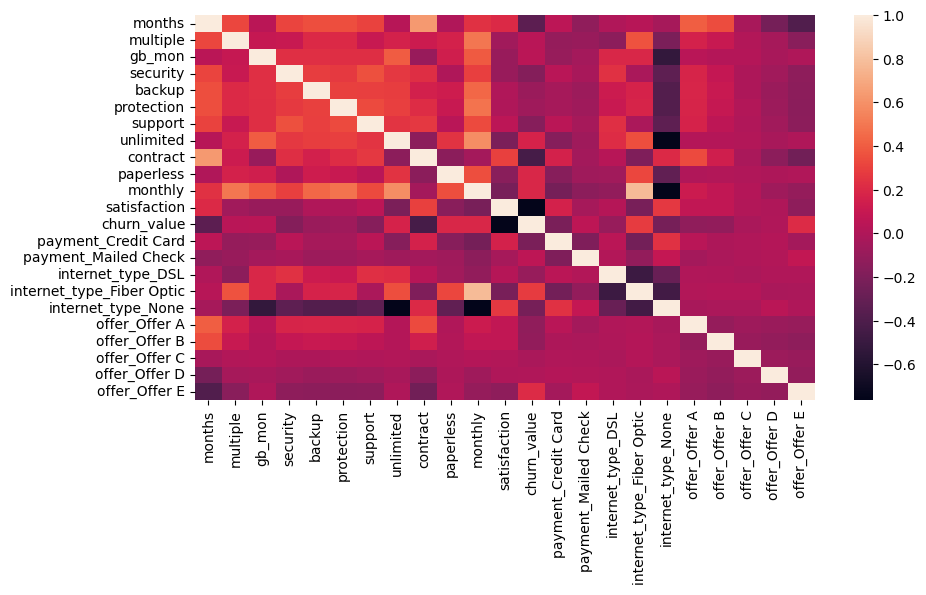

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=False)
plt.show()

<h2 id="TargPreproc">Part 2: Examining the Target and Preprocessing</h2>

In this exercise, we will proceed as follows:

*   Examine distribution of the predicted variable (`churn_value`).
*   Split the data into train and test sets. Decide if a stratified split should be used or not based on the distribution.
*   Examine the distribution of the predictor variable in the train and test data.


In [10]:
# Data are skewed at ~74% towards non-churned customers
# It is importanted to be remembered when model building
target = 'churn_value'
data[target].value_counts(normalize=True)

churn_value
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Given the skew in the predictor variable, let's split the data with the *churned* values being stratified to ensure that the test and train sets have similar distributions.


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# get features without target column
feature_cols = list(data.columns.difference([target]))

# Split the data into two parts with 1500 points in the test data
s_shuff_splt = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# Get the index values form the generator
train_idx, test_idx = next(s_shuff_splt.split(data[feature_cols], data[target]))

# Create data frames
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, target]

Let's check the distributions:


In [12]:
y_train.value_counts(normalize=True)

churn_value
0    0.73462
1    0.26538
Name: proportion, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

churn_value
0    0.734667
1    0.265333
Name: proportion, dtype: float64

<h2 id ="OOB">Part 3: Random Forest and Out-of-bag(oob) Error</h2>

In this exercise, we will:

*   Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
*   Plot the resulting oob errors as a function of the number of trees.

*Note:* since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.


In [14]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [15]:
def model_fitting(model):
    oob_list = []
    
    # Iterate through possible n_trees
    for n_trees in [15,20,30,40,50,100,150,200,300,400]:

        # Setting numbero of trees parameter
        model.set_params(n_estimators = n_trees)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # visualize
        evaluation_check(y_test, y_pred, f"n_trees = {n_trees}")

        # Get oob error
        oob_error = 1 - model.oob_score_
        # oob_error = rf.oob_score_


        # Append inside the list
        oob_list.append(pd.Series({'n_trees': n_trees, 
                                   'oob_error': oob_error}))
        
        result = pd.concat(oob_list, axis=1).T.set_index('n_trees')
    return result

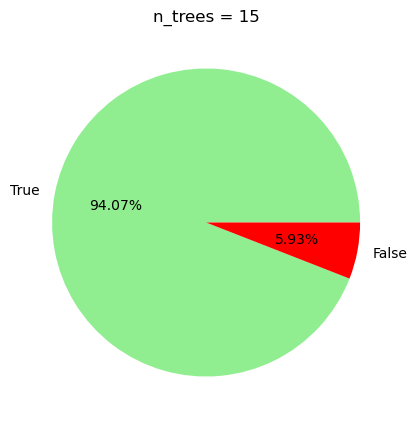

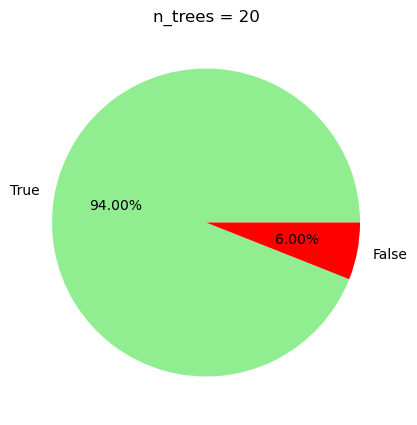

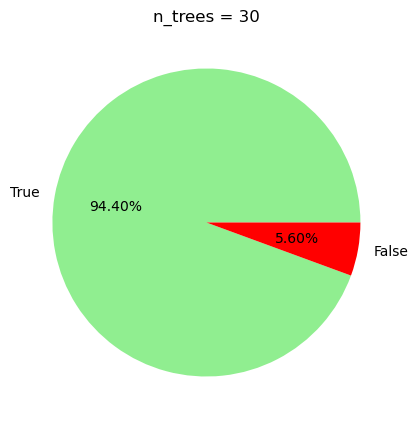

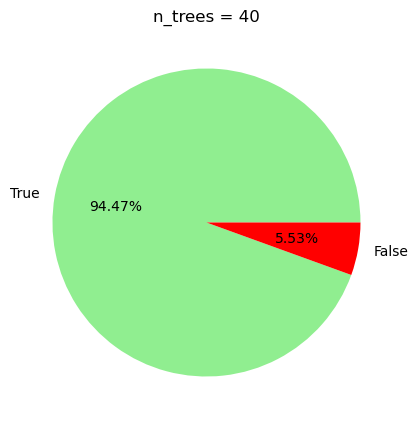

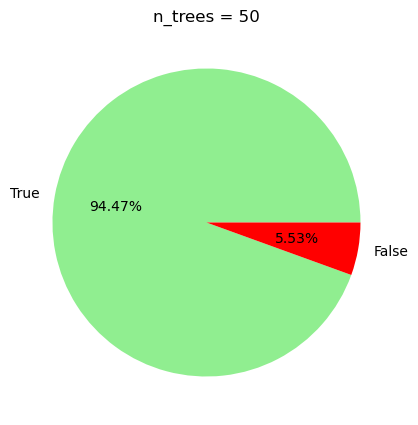

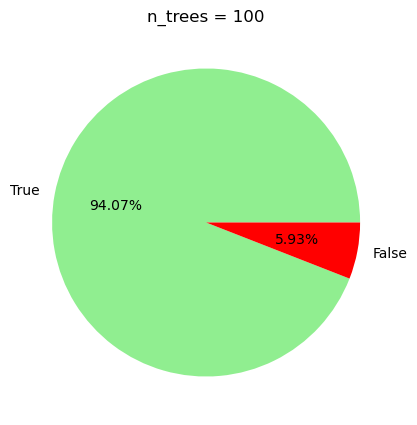

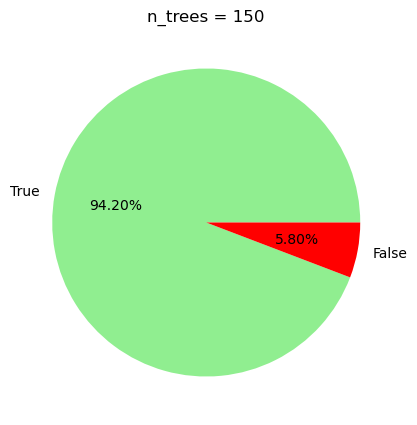

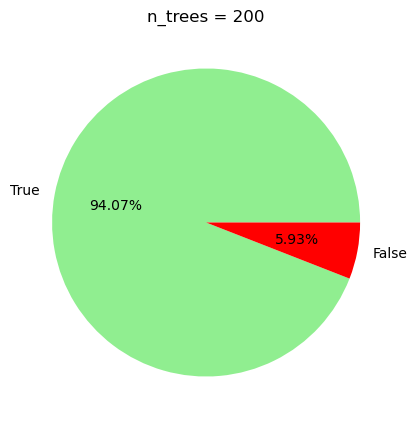

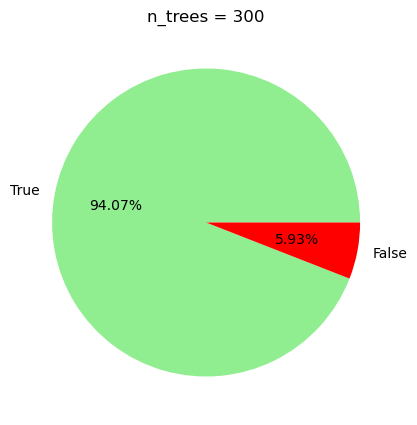

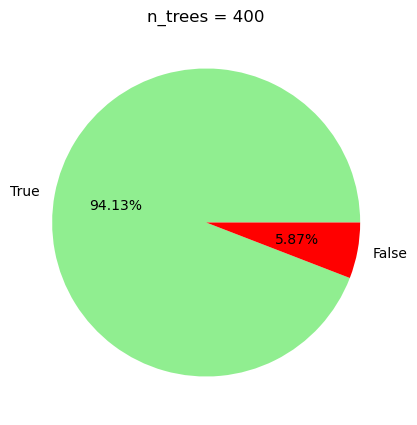

,oob_error
n_trees,
15.0,0.050514
20.0,0.050875
30.0,0.049793
40.0,0.051055
50.0,0.050153
100.0,0.049251
150.0,0.047988
200.0,0.048530
300.0,0.047988


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees will be setup insidte the function
rf = RandomForestClassifier(oob_score=True, 
                            warm_start=True, 
                            n_jobs=-1, 
                            random_state=42)

    
rf_oob_df = model_fitting(model=rf)
rf_oob_df

The error looks like it has stabilized around 100-150 trees.


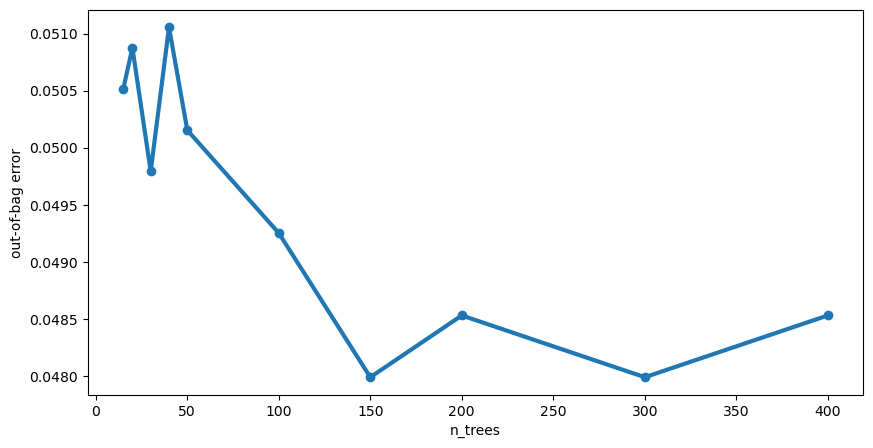

In [17]:
rf_oob_df.plot(legend=False, marker='o', figsize=(10,5), lw=3)
plt.ylabel('out-of-bag error')
plt.show()

<h2 id = "ExtraTrees">Part 4: Extra Trees</h2>

Our exercise:

*   Repeat question 3 using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.
*   Compare the out-of-bag errors for the two different types of models.


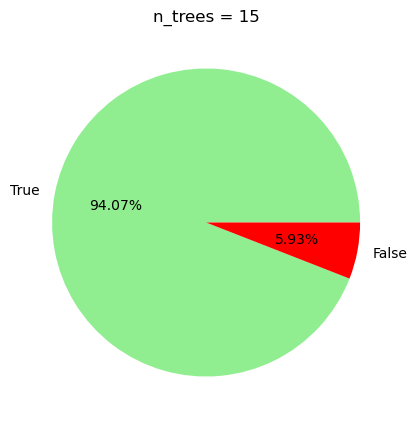

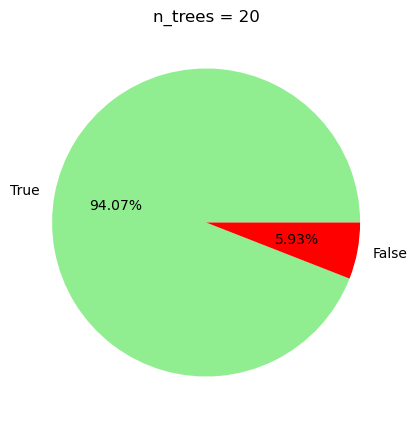

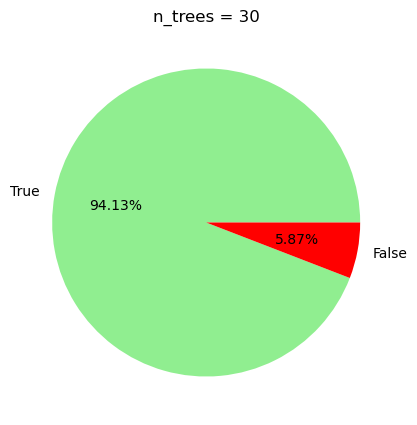

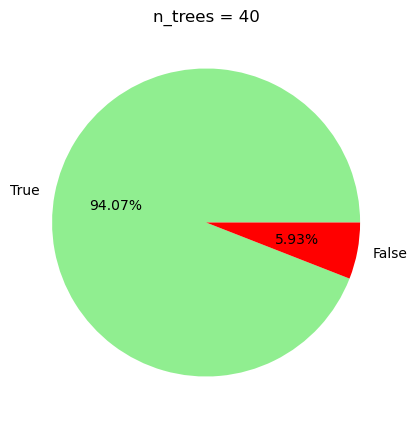

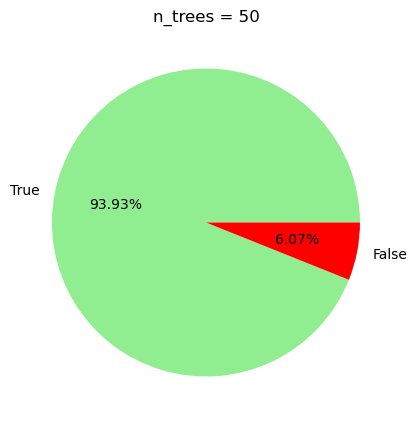

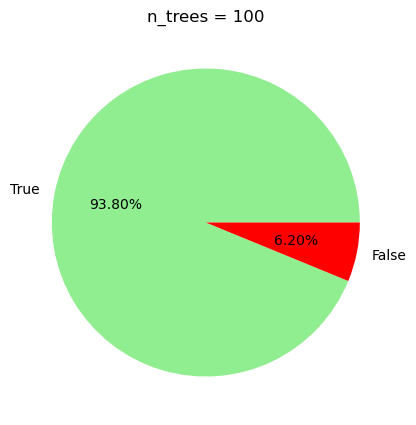

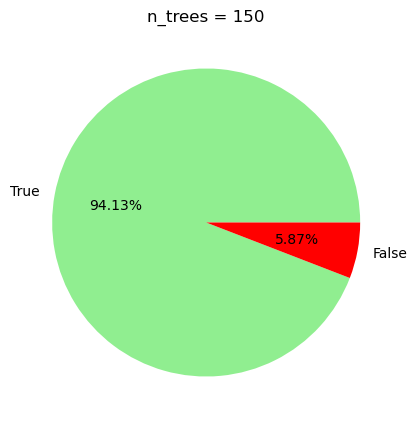

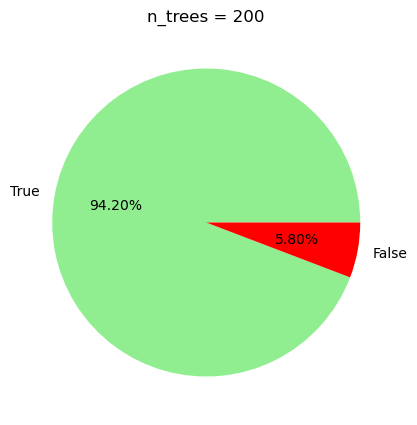

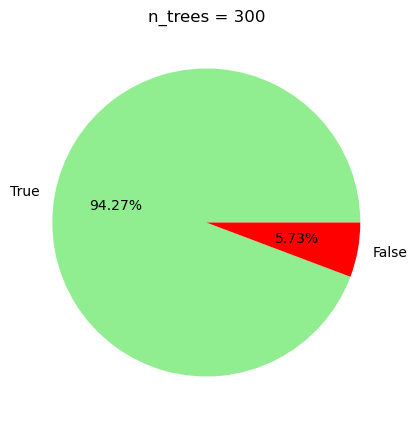

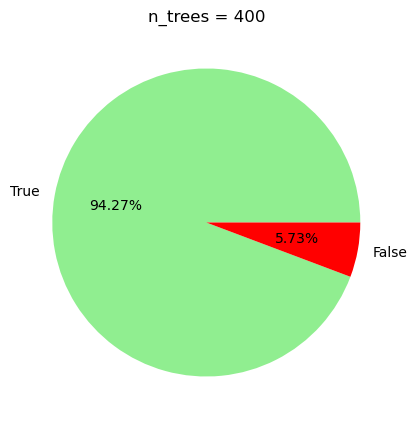

,oob_error
n_trees,
15.0,0.066390
20.0,0.059895
30.0,0.055024
40.0,0.056107
50.0,0.052679
100.0,0.051416
150.0,0.049793
200.0,0.051416
300.0,0.049793


In [18]:
from sklearn.ensemble import ExtraTreesClassifier

ef = ExtraTreesClassifier(oob_score=True, 
                          bootstrap=True, 
                          n_jobs=-1, 
                          warm_start=True,
                          random_state=42)



et_oob_df = model_fitting(ef)
et_oob_df

Combine the two dataframes into a single one for easier plotting.


In [19]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob_error':'RandomForest'}), 
                    et_oob_df.rename(columns={'oob_error':'ExtraTrees'})], 
                   axis=1)
oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.050514,0.066390
20.0,0.050875,0.059895
30.0,0.049793,0.055024
40.0,0.051055,0.056107
50.0,0.050153,0.052679
100.0,0.049251,0.051416
150.0,0.047988,0.049793
200.0,0.048530,0.051416
300.0,0.047988,0.049793


The random forest model performs consistently better than the extra randomized trees.


<Figure size 1000x500 with 0 Axes>

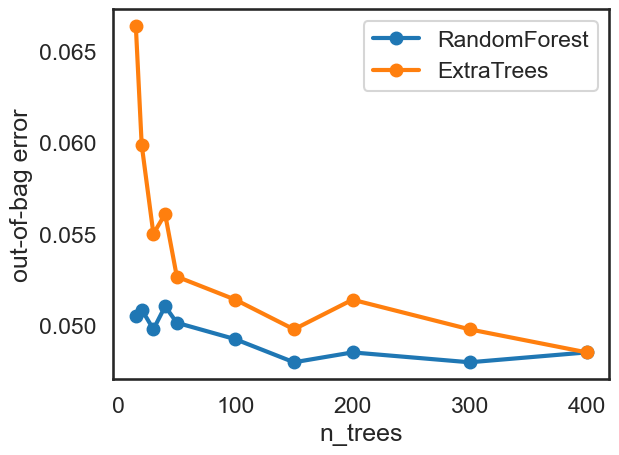

In [20]:
sns.set_context('talk')
sns.set_style('white')

plt.figure(figsize=(10,5))
oob_df.plot(marker='o', lw=3)
plt.ylabel('out-of-bag error')
plt.show()

<h2 id="results">Part 5: Gathering Results</h2>

Here, we will:

*   Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set.
*   Given the distribution of the predicted class, which metric is most important? Which could be deceiving?


In [21]:
# random forest with 100 estimators
md = rf.set_params(n_estimators=100) # n_trees = 100
y_pred = md.predict(X_test)

Unsurprisingly, recall is rather poor for the customers who churned (True) class since they are quite small. We are doing better than random guessing, though, as the accuracy is 0.94 (vs 0.85 for random guessing).


In [22]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [23]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1102
           1       0.94      0.83      0.88       398

    accuracy                           0.94      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.94      0.94      0.94      1500



In [24]:
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred), 
                         'precision': precision_score(y_test, y_pred), 
                         'recall': recall_score(y_test, y_pred),
                         'f1_score': f1_score(y_test, y_pred), 
                         'roc_auc':roc_auc_score(y_test, y_pred)}, 
                        index=pd.Index([0]))
score_df

,accuracy,precision,recall,f1_score,roc_auc
0,0.941333,0.940341,0.831658,0.882667,0.906301


<h2 id="examineRes">Part 6: Examining Results</h2>

The following exercises will help us examine results:

*   Print or visualize the confusion matrix.
*   Plot the ROC-AUC and precision-recall curves.
*   Plot the feature importances.


In [25]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm

array([[0.98094374, 0.01905626],
       [0.16834171, 0.83165829]])

In [27]:
md.classes_

array([0, 1])

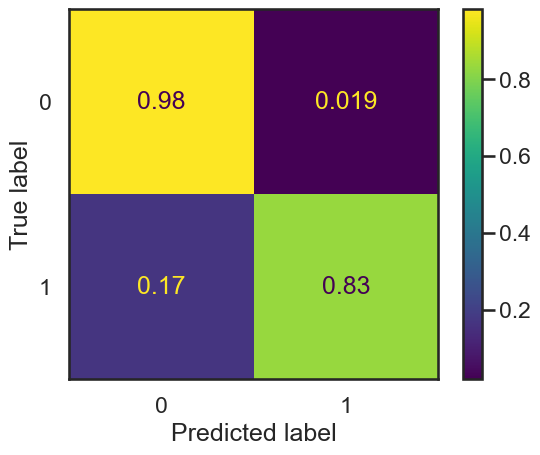

In [28]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=md.classes_)
display.plot()
plt.show()

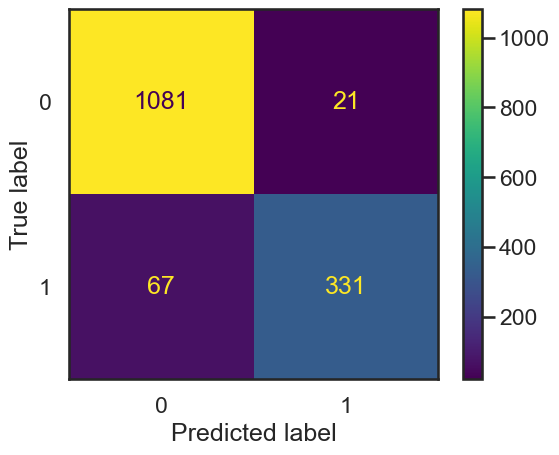

In [29]:
# Visualize without normalization
dsp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), 
                                 display_labels=md.classes_)
dsp2.plot()
plt.show()

The ROC-AUC and precision-recall curves.


In [30]:
# Get probabilities from each two categories
y_prob = md.predict_proba(X_test)
y_prob[0] # array([class 0(-), class 1(+)])

array([0.045, 0.955])

In [31]:
# Find ROC-AUC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
# fpr = False Positive Rate
# tpr = True Positive Rate

In [32]:
# Find Precision-Recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:, 1])

`y_prob[:, 0]` $\to$ Probability of **class 0** (negative class)  
`y_prob[:, 1]` $\to$ Probability of **class 1** (positive class)  

**For example:**  
y_prob =   
[[0.80, 0.20],  
[0.35, 0.65],  
[0.10, 0.90],  

- 1st row means the model predicts 80% probability for class 0 and 20% probability for class 1.
- 2nd row means 35% for class 0 and 65% for class 1.
- 3rd row means 10% for class 0 and 90% for class 1.  
**Note:** Since ROC-AUC is typically used for detecting positive cases, we focus on the probability of class 1.

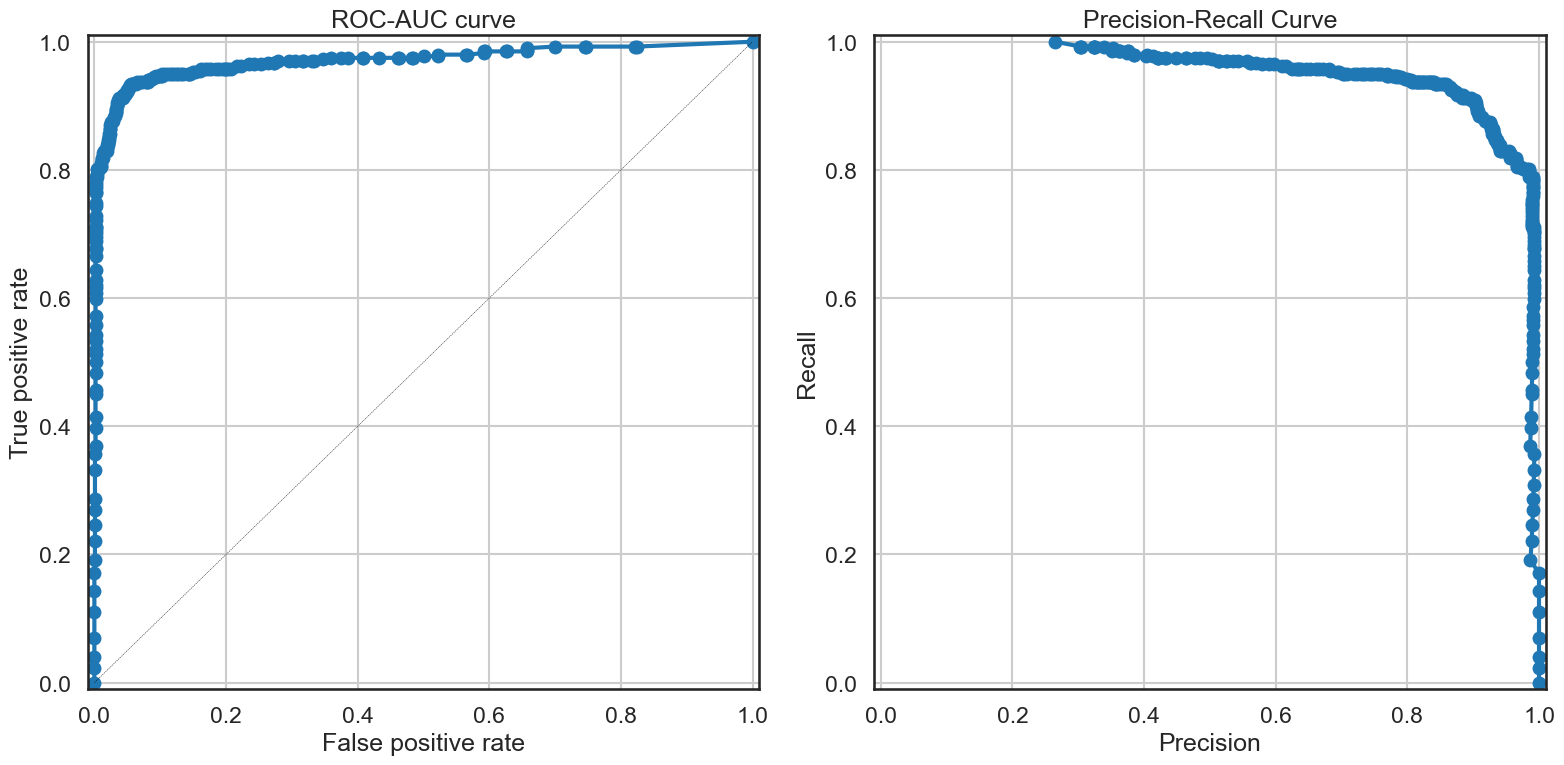

In [33]:
fig, axList = plt.subplots(ncols=2, figsize=(16,8))
# fig.set_size_inches(16,8)

# Plot ROC-AUC curve
ax = axList[0]

ax.plot(fpr, tpr, marker='o', lw=3)

ax.plot([0,1],[0,1], ls='--', color='black', lw=.3) # plot diagonal line
ax.set(xlabel='False positive rate', # label x-axis
       ylabel='True positive rate',  # label y-axis
       xlim=[-.01, 1.01],            # limit values for x-axis
       ylim=[-.01, 1.01],            # limit values for y-axis
       title='ROC-AUC curve')
    

ax.grid(True)  # add grid line inside the plot
# ---------------------------------------------

# Plot Precision curve
ax = axList[1]

ax.plot(precision, recall, marker='o', lw=3)
ax.set(xlabel='Precision', 
       ylabel='Recall', 
       xlim=[-.01, 1.01], 
       ylim=[-.01, 1.01], 
       title='Precision-Recall Curve')
ax.grid(True)

plt.tight_layout()
plt.show()

Now, let's look into the importance of features. Apparently, "satisfaction" is the most significant predictor of customer churn.


In [34]:
# Feature importance
feature_imp = pd.Series(md.feature_importances_, index=feature_cols) \
                .sort_values(ascending=False)
feature_imp

satisfaction                 0.551463
contract                     0.086728
monthly                      0.086723
gb_mon                       0.059976
months                       0.047885
internet_type_Fiber Optic    0.023417
security                     0.021007
payment_Credit Card          0.016185
paperless                    0.012856
offer_Offer E                0.012128
support                      0.012026
backup                       0.010097
multiple                     0.008978
protection                   0.008695
internet_type_None           0.008369
unlimited                    0.007689
internet_type_DSL            0.006074
offer_Offer D                0.005531
payment_Mailed Check         0.004511
offer_Offer B                0.004247
offer_Offer C                0.003244
offer_Offer A                0.002171
dtype: float64

In [35]:
feature_imp.apply(lambda pct: '{:1.2f}%'.format(pct))
# Same with "feature_imp.apply(lambda pct: f'{pct:.2f}%')"

satisfaction                 0.55%
contract                     0.09%
monthly                      0.09%
gb_mon                       0.06%
months                       0.05%
internet_type_Fiber Optic    0.02%
security                     0.02%
payment_Credit Card          0.02%
paperless                    0.01%
offer_Offer E                0.01%
support                      0.01%
backup                       0.01%
multiple                     0.01%
protection                   0.01%
internet_type_None           0.01%
unlimited                    0.01%
internet_type_DSL            0.01%
offer_Offer D                0.01%
payment_Mailed Check         0.00%
offer_Offer B                0.00%
offer_Offer C                0.00%
offer_Offer A                0.00%
dtype: object

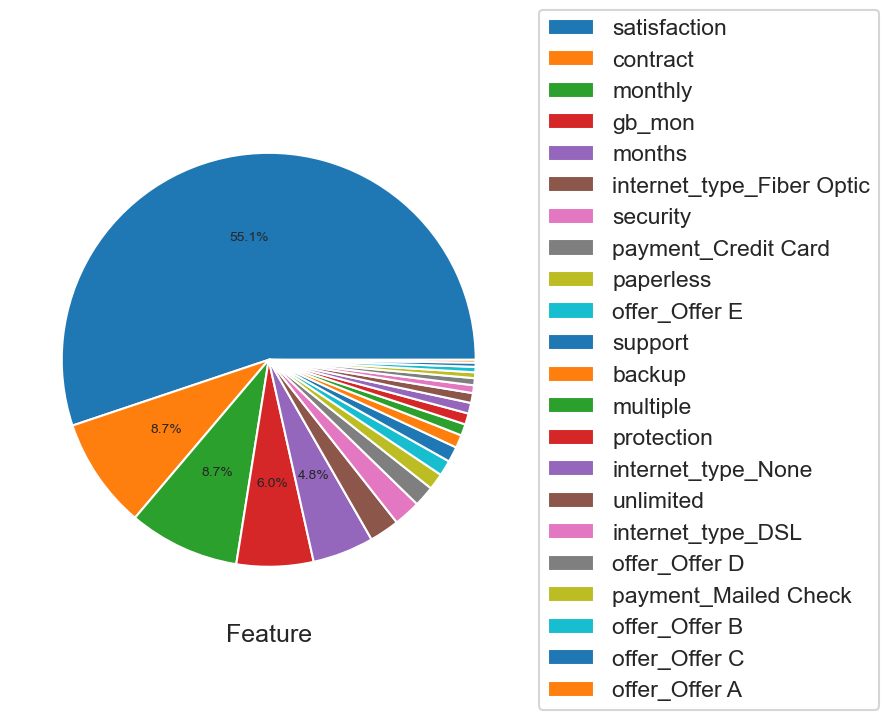

In [36]:
fig, ax = plt.subplots(figsize=(16,6))
ax.pie(feature_imp, 
       autopct=lambda pct: '{:1.1f}%'.format(pct) if pct >= 4 else '',
       textprops={'fontsize': 10})
ax.set(ylabel='Relative Importance', xlabel='Feature')
plt.tight_layout()

# Move legend box out of the chart area
plt.legend(loc='center left', labels=feature_imp.index, bbox_to_anchor=(1,.5))
plt.ylabel('')
plt.show()

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/richard-ye/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Richard Ye</a>


### Machine Learning Foundation (C) 2020 IBM Corporation

<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
| ----------------- | ------- | ---------- | ------------------ |
| 2022-01-27        | 0.1     | Joseph Santarcangelo | Created Lab Template |
| 2022-05-02        | 0.2     | Richard Ye | Added in estimated time, objectives and table of contents |--!>


